## Airbnb Case Study-Analysis

In [1]:
# Import all the important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
import plotly
import plotly.express as px

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", None)

plt.style.use("seaborn-dark-palette")

In [4]:
# import the data
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\AB_NYC_2019.csv")

In [5]:
# read the data
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [6]:
# Let's have a look on the dimensions of the data
data.shape

(48895, 16)

In [7]:
# Let's check the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# The above description shows that there are some numerical as well as the categorical variables are present, 
# so we have to perform both the analsis numerical as well as the categoraical

In [9]:
# for numerical analysis
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
# Let's check the missiong values and the outliers
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# It is observed that there are null values are present in name, host_name, last_review, reviews_per_month
# Certain columns are not efficient to the dataset so let us drop those columns
data.drop(['id','name','last_review'], axis = 1, inplace = True)

In [12]:
# Let us check wheather the columns are dropped or no
data.head(5)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [13]:
# reviews_per_month also has the missing values let us replace these values with '0' respectively
data.fillna({'reviews_per_month':0}, inplace = True)

In [14]:
data.reviews_per_month.isnull().sum()

0

In [15]:
# There are no missing values present in reviews_per_month column
# Now check the uniques values present in the columns

data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
len(data.room_type.unique())

3

In [17]:
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [18]:
len(data.neighbourhood_group.unique())

5

In [19]:
len(data.neighbourhood.unique())

221

In [20]:
# Extracting Numeric columns:

int_cols = data.select_dtypes(include=["int64", "float64"]).columns

In [21]:
# Tagging them:

list(enumerate(int_cols))

[(0, 'host_id'),
 (1, 'latitude'),
 (2, 'longitude'),
 (3, 'price'),
 (4, 'minimum_nights'),
 (5, 'number_of_reviews'),
 (6, 'reviews_per_month'),
 (7, 'calculated_host_listings_count'),
 (8, 'availability_365')]

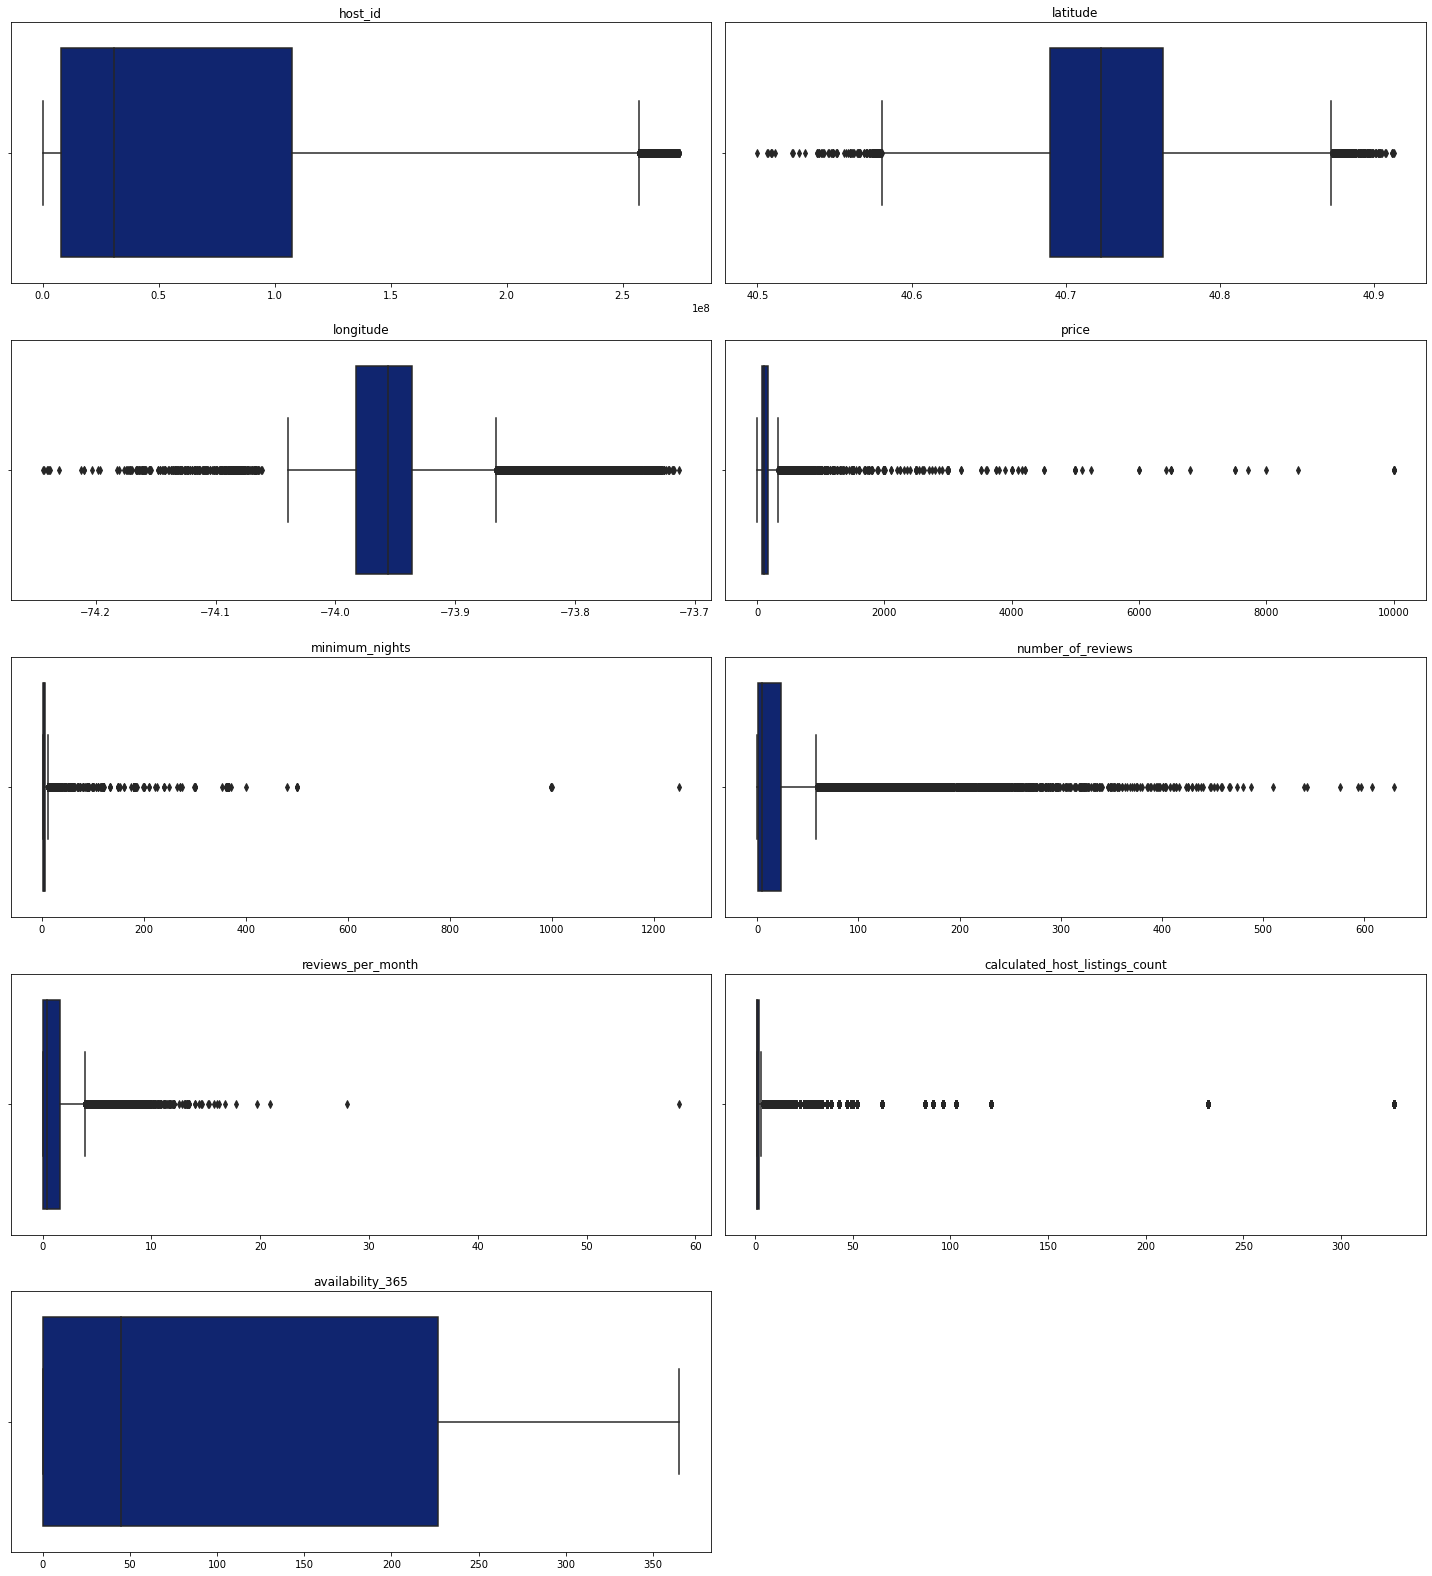

In [22]:
# Plotting the spread of outliers:

plt.figure(figsize=([20,22]))

for n,col in enumerate(int_cols):
    plt.subplot(5,2,n+1)

    sns.boxplot(data[col])

    plt.xlabel("")

    plt.ylabel("")

    plt.title(col)

    plt.tight_layout()

In [23]:
# Capping (statistical) outliers

# outlier treatment for price:

Q1 = data.price.quantile(0.10)

Q3 = data.price.quantile(0.90)

IQR = Q3 - Q1

data = data[(data.price >= Q1-1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]


In [24]:
# outlier treatment for minimum_nights:

Q1 = data.minimum_nights.quantile(0.10)

Q3 = data.minimum_nights.quantile(0.90)

IQR = Q3 - Q1

data = data[(data.minimum_nights >= Q1-1.5*IQR) & (data.minimum_nights <= Q3 + 1.5*IQR)]

In [25]:
# outlier treatment for reviews_per_month:

Q1 = data.reviews_per_month.quantile(0.10)

Q3 = data.reviews_per_month.quantile(0.90)

IQR = Q3 - Q1

data = data[(data.reviews_per_month >= Q1-1.5*IQR) & (data.reviews_per_month <= Q3 + 1.5*IQR)]

In [40]:
# outlier treatment for calculated_host_listings_count:

Q1 = data.calculated_host_listings_count.quantile(0.10)

Q3 = data.calculated_host_listings_count.quantile(0.90)

IQR = Q3 - Q1

data = data[(data.calculated_host_listings_count >= Q1-1.5*IQR) &

(data.calculated_host_listings_count <= Q3 + 1.5*IQR)]

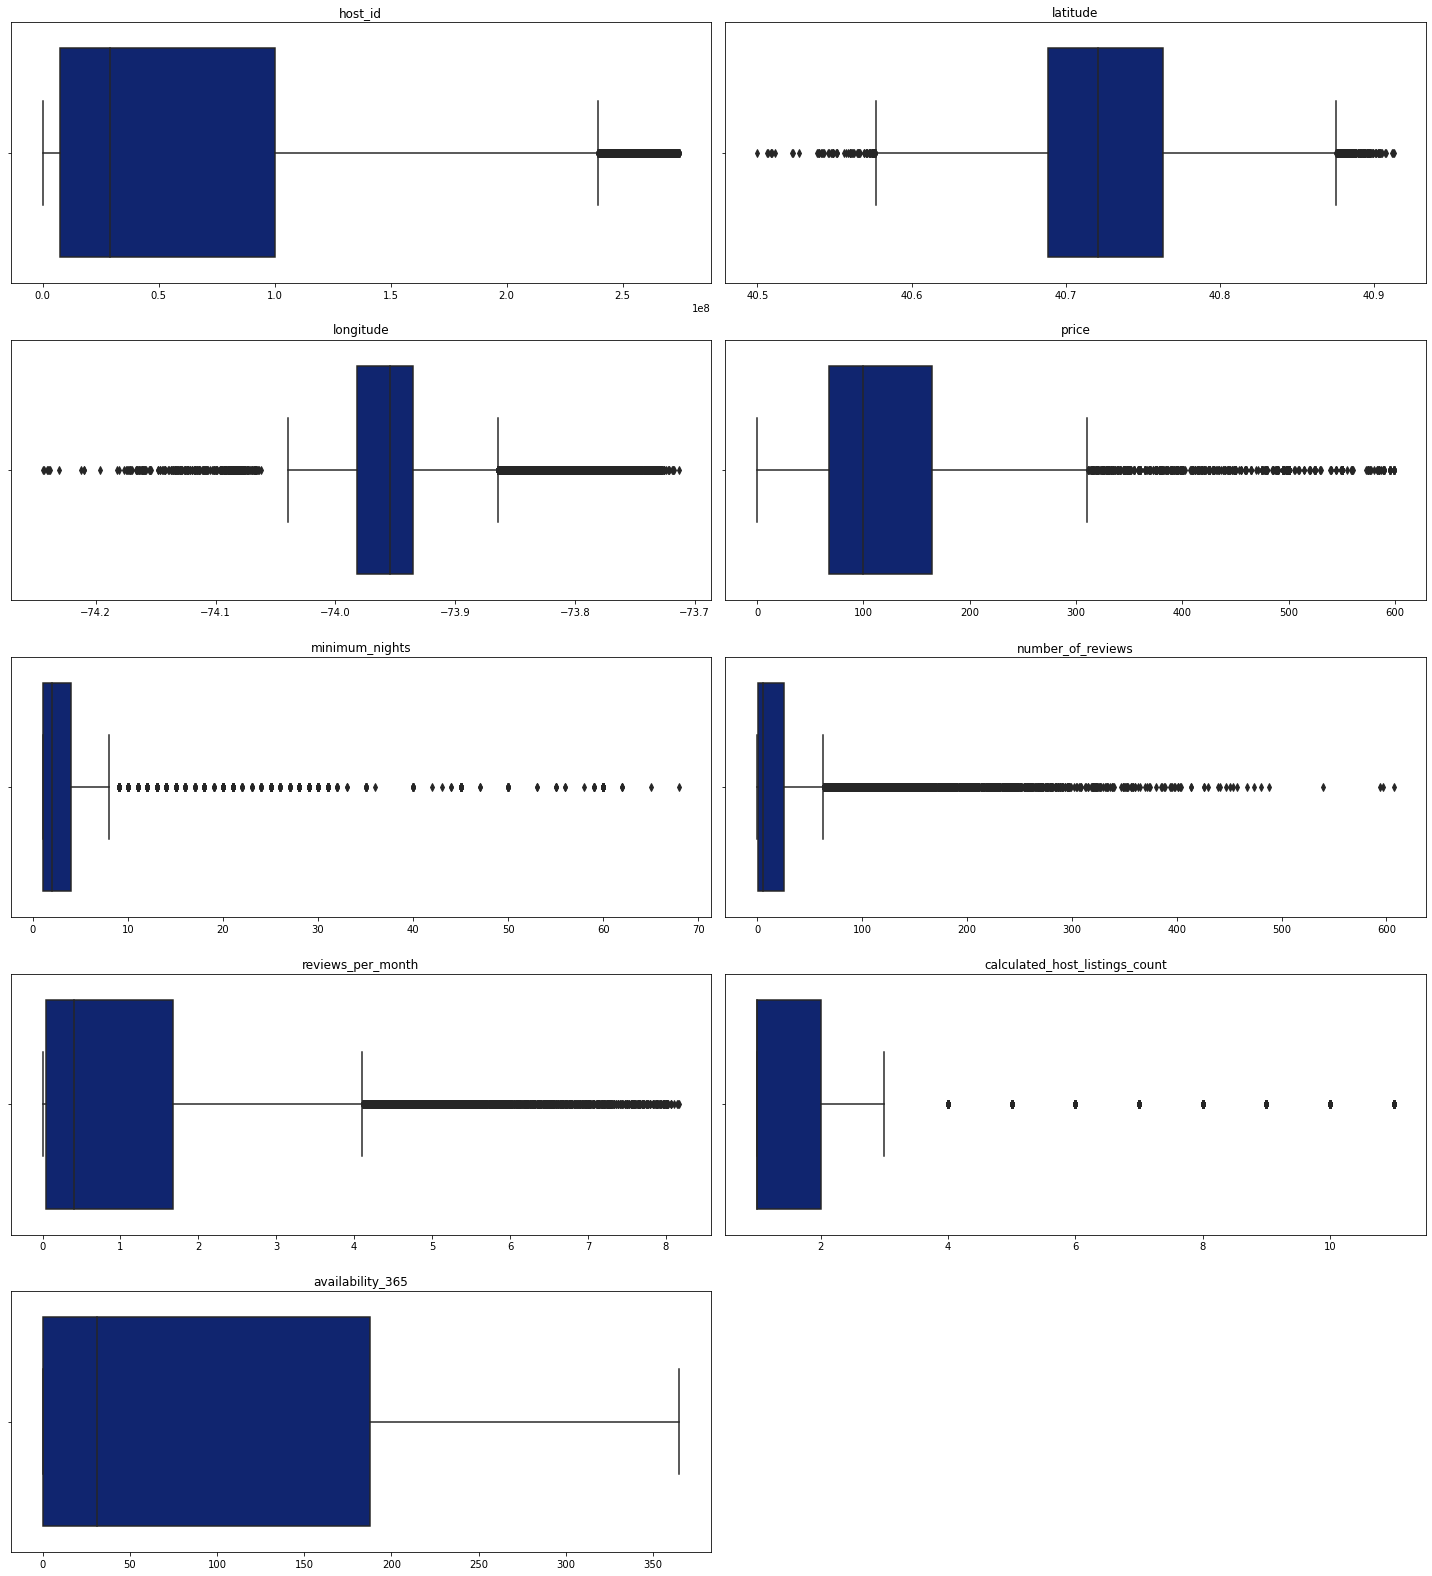

In [41]:
plt.figure(figsize=([20,22]))

for n,col in enumerate(int_cols):
    plt.subplot(5,2,n+1)

    sns.boxplot(data[col])

    plt.xlabel("")

    plt.ylabel("")

    plt.title(col)

    plt.tight_layout()

In [28]:
# Univariate Analysis:

# We started our general Univariate Analysis of Numeric and Categorical columns. 
# For numeric columns, we used a Distribution plot from seaborn and for categorical columns, 
# we used a Countplot from the same library seaborn. Below are the codes for the same.

In [29]:
# Extracting and Tagging the Numeric Columns:

int_cols = data.select_dtypes(include=['int64', 'float64']).columns

list(enumerate(int_cols))

[(0, 'host_id'),
 (1, 'latitude'),
 (2, 'longitude'),
 (3, 'price'),
 (4, 'minimum_nights'),
 (5, 'number_of_reviews'),
 (6, 'reviews_per_month'),
 (7, 'calculated_host_listings_count'),
 (8, 'availability_365')]

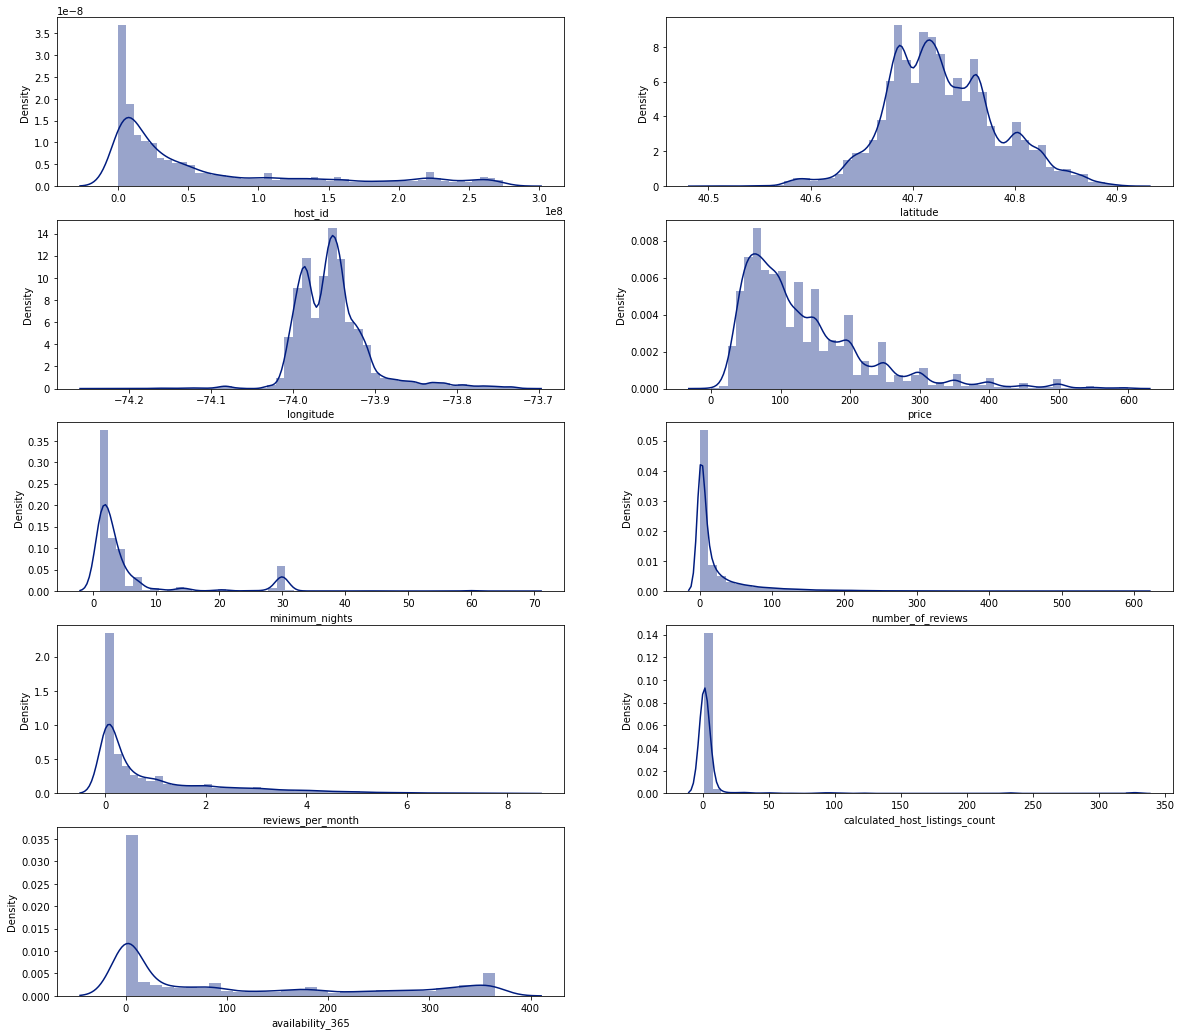

In [30]:
# Plotting the Numeric Variables Distribution:

int_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=[20,18])

for n,col in enumerate(int_cols):

    plt.subplot(5,2,n+1)

    sns.distplot(data[col])

In [31]:
# Findings:

# The Highest price range seems to be between 30 dollars to 150 dollars per day stay for most of the sites hosted.

# Still, we can see there are many sites that cost more than 200 dollars per day and can even go up to 500 dollars.

In [32]:
# Extracting and Tagging the Numeric Columns:

cat_cols = data.select_dtypes(include=['object']).columns

list(enumerate(cat_cols))

[(0, 'host_name'),
 (1, 'neighbourhood_group'),
 (2, 'neighbourhood'),
 (3, 'room_type')]

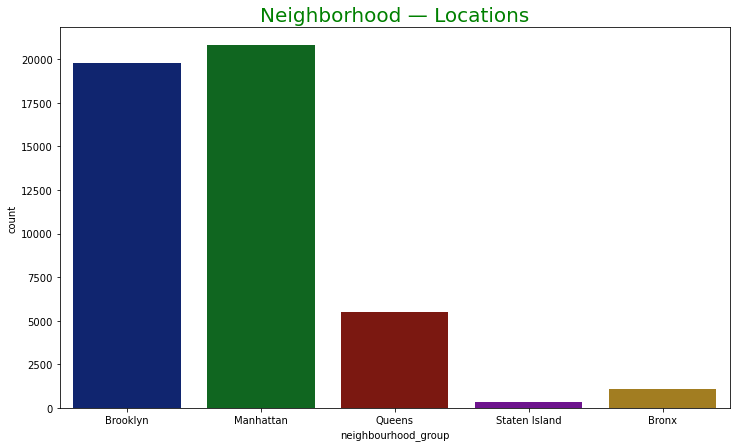

In [33]:
# Checking the count of Neighborhood Groups

plt.figure(figsize=[12,7])

sns.countplot(data.neighbourhood_group)

plt.title('Neighborhood — Locations', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})

plt.show()

In [37]:
# Similarly we used the countplot code for the rest of the categorical plots created.

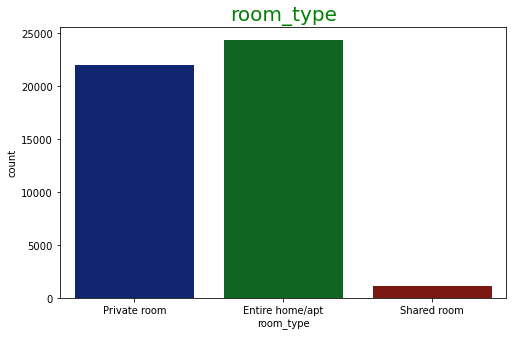

In [34]:
# Checking the count of Room Type

plt.figure(figsize=[8,5])

sns.countplot(data.room_type)

plt.title('room_type', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})

plt.show()

In [35]:
# Bi-Multivariate Analysis:

# Here we first plotted a pairplot of all the numeric columns using seaborn library in Python itself.
# Below is the code for the same.

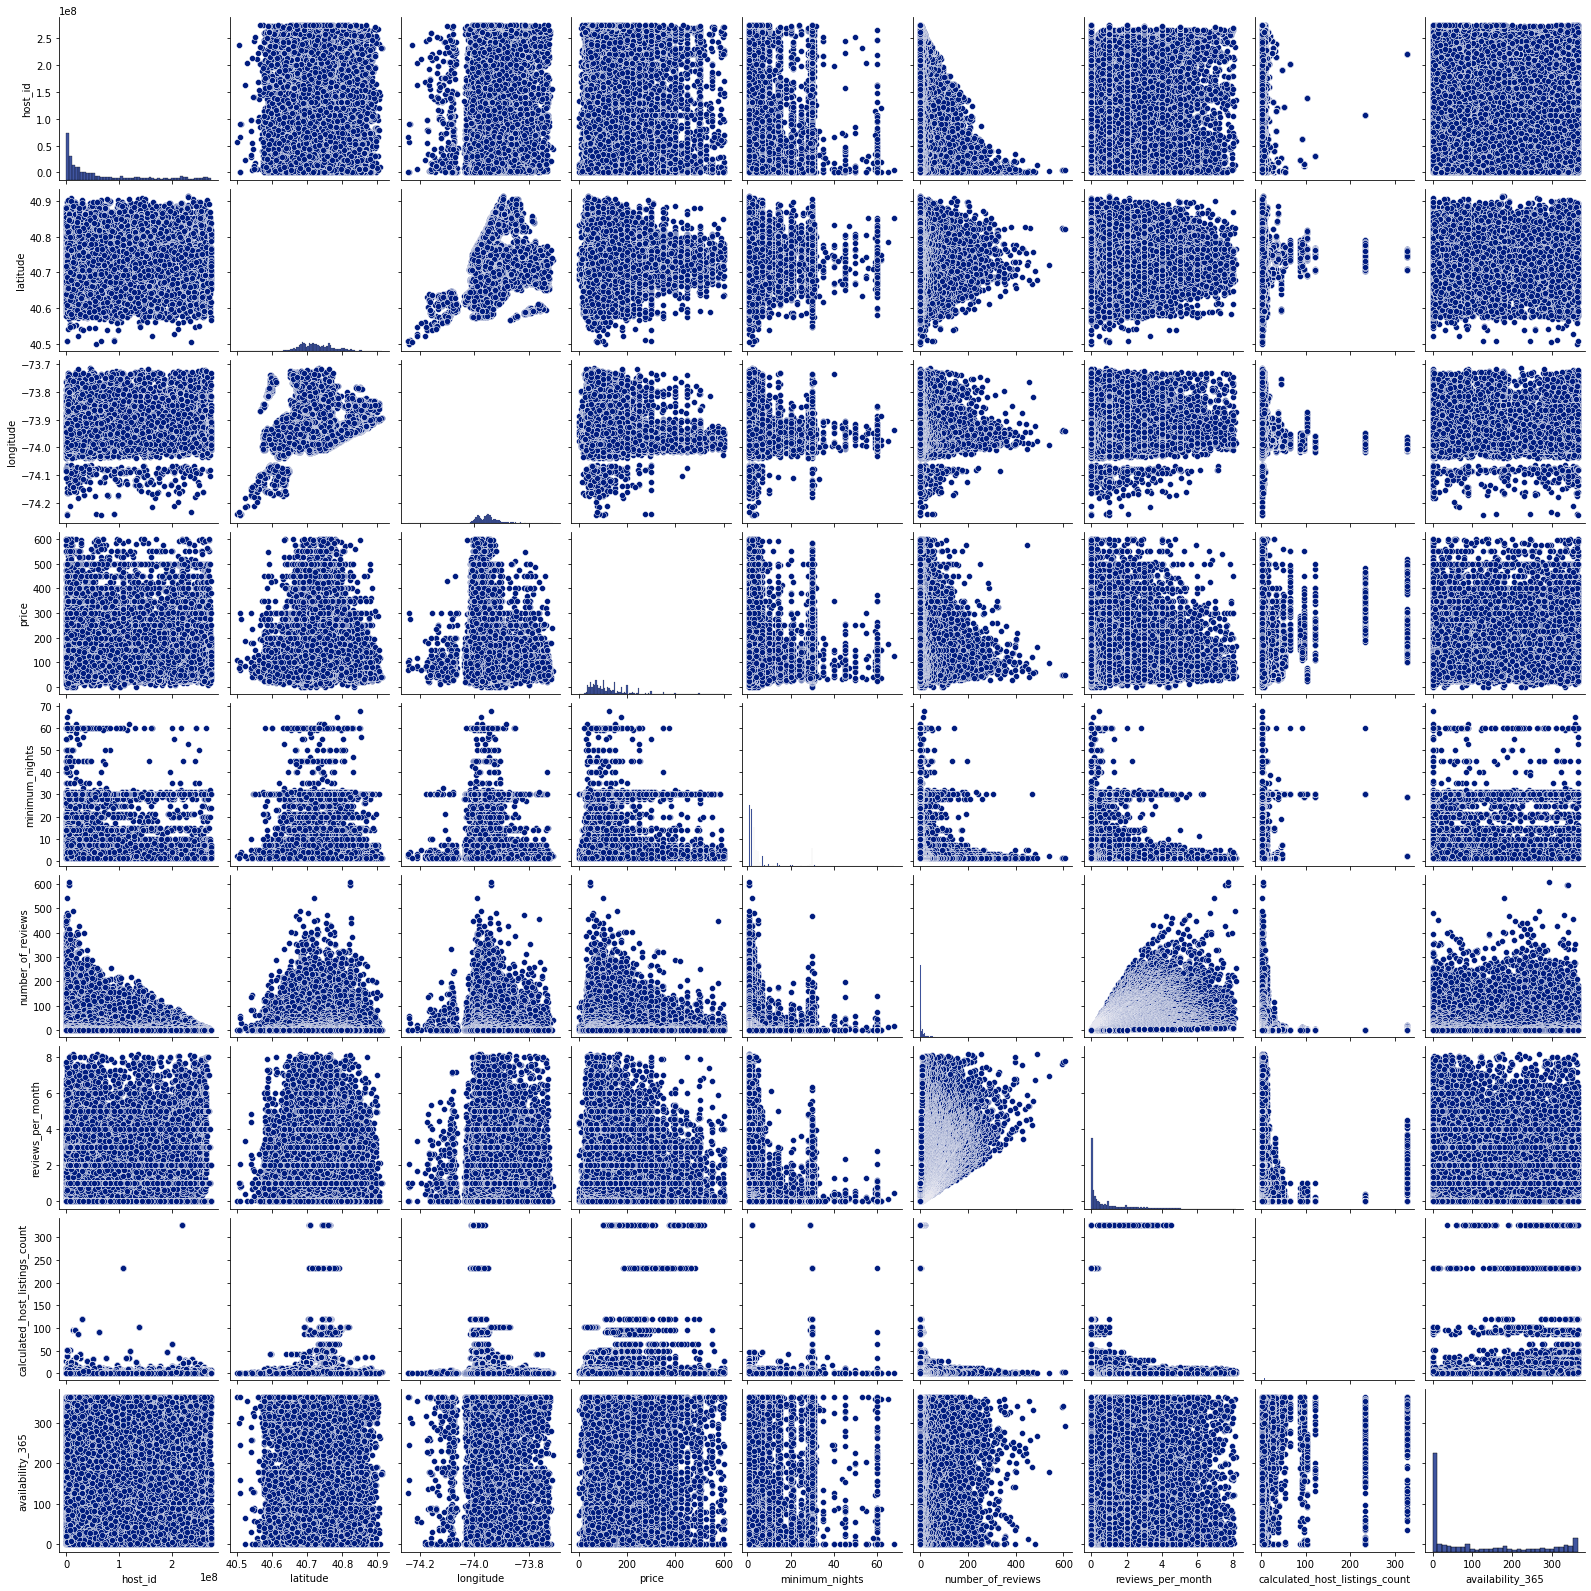

In [36]:
sns.pairplot(data)

plt.show()

In [38]:
# Parallel to we created all other Bivariate and Multivariate plots using Tableau.

In [39]:
data.to_csv('AIRBNB_modified.csv',index=True)